# CZ4042 Neural Networks & Deep Learning
## Assignment - 1: Part A, Question 5

> Gupta Jay  
> U1822549K  
> School of Computer Science and Engineering  
> Nanyang Technological University, Singapore  

## Imports

In [1]:
# Setting the seed here is sufficient. 
# If you don't plan to use these starter code, make sure you add this cell.

SEED = 42

import os
os.environ['TF_CUDNN_DETERMINISTIC'] = '1'

import random 
random.seed(SEED)

import numpy as np
np.random.seed(SEED)

import tensorflow as tf
tf.random.set_seed(SEED)

In [2]:
import pandas as pd
import numpy as np

# tensorflow libraries
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential

# sklearn libraries are useful for preprocessing, performance measures, etc.
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt

In [3]:
print(tf.__version__)

2.6.0


In [4]:
# Supress any warnings for clean presentation
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv('./features_30_sec.csv')
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [6]:
df['label'].value_counts()

blues        100
classical    100
country      100
disco        100
hiphop       100
jazz         100
metal        100
pop          100
reggae       100
rock         100
Name: label, dtype: int64

Split and scale dataset

In [7]:
columns_to_drop = ['label','filename', 'length']

def prepare_dataset(df, columns_to_drop, test_size, random_state):

    # Encode the labels from 0 to n_classes-1  
    label_encoder = preprocessing.LabelEncoder()
    df['label'] = label_encoder.fit_transform(df['label'])
  
    # devide data to train and test
    df_train, df_test = train_test_split(df, test_size=test_size, random_state=random_state)
    
    # scale the training inputs
    x_train = df_train.drop(columns_to_drop,axis=1)
    y_train = df_train['label'].to_numpy()
    
    standard_scaler = preprocessing.StandardScaler()
    x_train_scaled = standard_scaler.fit_transform(x_train)

    #scale and prepare testing data
    x_test = df_test.drop(columns_to_drop,axis=1)
    x_test_scaled = standard_scaler.transform(x_test)
    y_test = df_test['label'].to_numpy() 
  
    return x_train_scaled, y_train, x_test_scaled, y_test

In [8]:
X_train, y_train, X_test, y_test = prepare_dataset(df, columns_to_drop, test_size=0.3, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(700, 57) (700,)
(300, 57) (300,)


## Part A: Investigation on Dropouts

In [10]:
def getModel(first_layer_activation, second_layer_activation, add_dropout):
    # Inputs -> Dense -> Dropout -> Dense (Output)
    model = keras.Sequential()
    model.add(layers.Dense(16, activation=first_layer_activation, input_dim=X_train.shape[1]))
    # Parameterized Dropout if required
    if(add_dropout):
        model.add(layers.Dropout(0.3))
    model.add(layers.Dense(df['label'].nunique(), activation=second_layer_activation))
    return model

def getOptimizer():
    # Adam Optimizer (Default Parameters) -> Stochastic Gradient Descent
    optimizer = keras.optimizers.Adam()
    return optimizer

In [12]:
loss = "sparse_categorical_crossentropy"
metrics = ["accuracy"]
optimizer = getOptimizer()

# Model without the Dropout layer
model_without_dropout = getModel("relu", "softmax", add_dropout=False)
model_without_dropout.compile(loss=loss, optimizer=optimizer, metrics=metrics)

# Model with the Dropout layer
model_with_dropout = getModel("relu", "softmax", add_dropout=True)
model_with_dropout.compile(loss=loss, optimizer=optimizer, metrics=metrics)

In [15]:
epochs = 50
verbose = 1
batch_size = 1

# Fit both models
history_without_dropout = model_without_dropout.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=verbose, batch_size=batch_size)
history_with_dropout = model_with_dropout.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=verbose, batch_size=batch_size)

2021-10-12 11:58:22.847355: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
700/700 [==============================] - 1s 1ms/step - loss: 1.8777 - accuracy: 0.3343 - val_loss: 1.6026 - val_accuracy: 0.4300
Epoch 2/50
700/700 [==============================] - 1s 951us/step - loss: 1.3489 - accuracy: 0.5529 - val_loss: 1.3911 - val_accuracy: 0.5267
Epoch 3/50
700/700 [==============================] - 1s 921us/step - loss: 1.1465 - accuracy: 0.6129 - val_loss: 1.2407 - val_accuracy: 0.5600
Epoch 4/50
700/700 [==============================] - 1s 986us/step - loss: 1.0009 - accuracy: 0.6600 - val_loss: 1.1575 - val_accuracy: 0.6033
Epoch 5/50
700/700 [==============================] - 1s 924us/step - loss: 0.8984 - accuracy: 0.7071 - val_loss: 1.1140 - val_accuracy: 0.6033
Epoch 6/50
700/700 [==============================] - 1s 920us/step - loss: 0.8155 - accuracy: 0.7357 - val_loss: 1.0972 - val_accuracy: 0.6033
Epoch 7/50
700/700 [==============================] - 1s 1ms/step - loss: 0.7544 - accuracy: 0.7486 - val_loss: 1.0434 - val_accuracy: 0.6

### Plotting Accuracy agaist Training Epochs

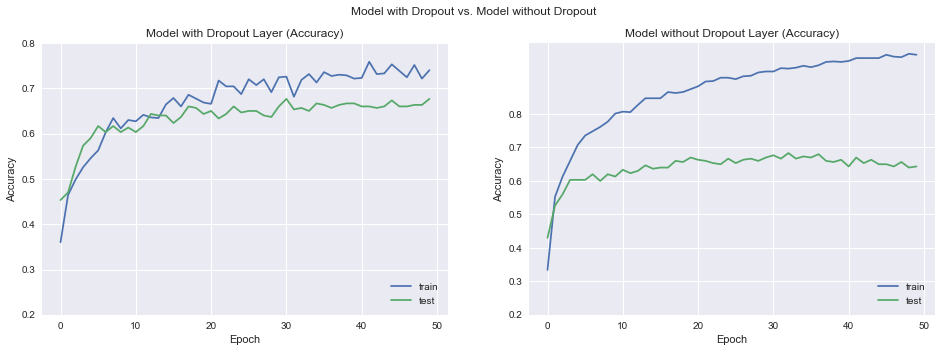

In [39]:
plt.style.use("seaborn")

# Plot Configuration
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
fig.suptitle('Model with Dropout vs. Model without Dropout')

# Plot for model with Dropout Layer
# ------
# Extracting Train & Test Accuracy from model history
accuracy = history_with_dropout.history['accuracy']
val_accuracy = history_with_dropout.history['val_accuracy']

# Plotting
ax1.plot(accuracy)
ax1.plot(val_accuracy)

# Labelling
ax1.set_title('Model with Dropout Layer (Accuracy)')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend(['train', 'test'], loc='lower right')
ax1.set_yticks(np.arange(0.2, 0.9, 0.1))
# ------

# Plot for model without Dropout Layer
# ------
# Extracting Train & Test Accuracy from model history
accuracy = history_without_dropout.history['accuracy']
val_accuracy = history_without_dropout.history['val_accuracy']

# Plotting
ax2.plot(accuracy)
ax2.plot(val_accuracy)

# Labelling
ax2.set_title('Model without Dropout Layer (Accuracy)')
ax2.set_ylabel('Accuracy')
ax2.set_xlabel('Epoch')
ax2.legend(['train', 'test'], loc='lower right')
ax2.set_yticks(np.arange(0.2, 0.9, 0.1))
# ------

plt.show()

### Plotting Loss agaist Training Epochs

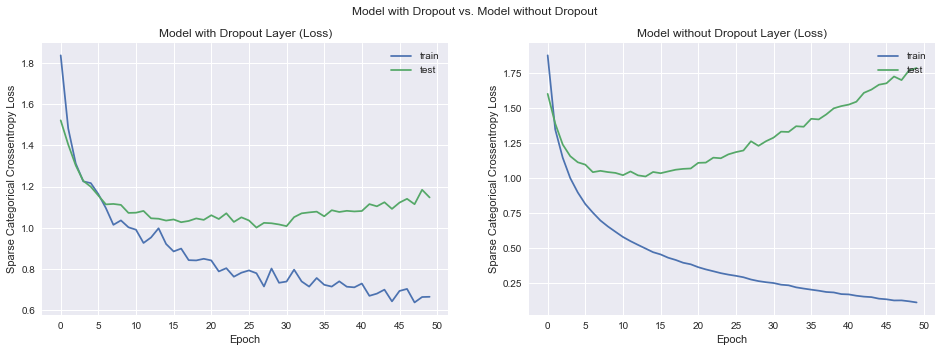

In [40]:
plt.style.use("seaborn")

# Plot Configuration
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
fig.suptitle('Model with Dropout vs. Model without Dropout')

# Plot for model with Dropout Layer
# ------
# Extracting Train & Test Loss from model history
loss = history_with_dropout.history['loss']
val_loss = history_with_dropout.history['val_loss']

# Plotting
ax1.plot(loss)
ax1.plot(val_loss)

# Labelling
ax1.set_title('Model with Dropout Layer (Loss)')
ax1.set_ylabel('Sparse Categorical Crossentropy Loss')
ax1.set_xlabel('Epoch')
ax1.legend(['train', 'test'], loc='upper right')
ax1.set_xticks(np.arange(0, 50+1, 5.0))
# ------

# Plot for model without Dropout Layer
# ------
# Extracting Train & Test Loss from model history
loss = history_without_dropout.history['loss']
val_loss = history_without_dropout.history['val_loss']

# Plotting
ax2.plot(loss)
ax2.plot(val_loss)

# Labelling
ax2.set_title('Model without Dropout Layer (Loss)')
ax2.set_ylabel('Sparse Categorical Crossentropy Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['train', 'test'], loc='upper right')
ax2.set_xticks(np.arange(0, 50+1, 5.0))
# ------

plt.show()

## Part B: Effect of removing Dropout 

From the graphs plotted above, we observe that the model without the Dropout layer has `lower test accuracies` and `higher test losses` as compared to the neural network model with the dropout layers. However, the `train accuracy` remains high and `train loss` remains low. This means that without the dropout layer, the model is overfitting on the data.

Overfitting is one of the problems that occur during training of neural networks, which drives the training error of the network to a very small value at the expense of the test error. The network learns to respond correctly to the training inputs by remembering them too much but is unable to generalize to produce correct outputs to novel inputs. (Ref: CZ4042 Lecture 5 (NTU) - Model Selection & Overfitting, Jagath Chandana Rajapakse)

## Part C: Addressing Overfitting

**Use Regularization**

Using dropouts and early stopping are ways to prevent overfitting. Since we have already used both of them, another way to address overfitting is by using `L1 & L2 Regularization` techniques. During training, some weights attain large values to reduce training error, jeopardizing its ability to generalizing. In order to avoid this, a penalty term regularization term) is added to the cost function. (Ref: CZ4042 Lecture 5 (NTU) - Model Selection & Overfitting, Jagath Chandana Rajapakse)

* **L1 Regualization (Lasso Regression)** - Add **"absolute value of magnitude"** of coefficient as penalty term to the loss function.
* **L2 Regualization (Ridge Regression)** - Add **"squared magnitude"** of coefficient as penalty term to the loss function.

## End of Part A, Question 5. 

## Conclusion

For questions in Part A, we examined building a neural network model that predicts the genre of a song by using many features as inputs, and tried to optimize the parameters of the model. Firstly, we built a simple two-layer feedforward neural network. After examining its accuracy and losses, we experimented with different batch sizes and different number of hidden neurons for model training. Afterwards, we investigated whether a three-layer neural network will be better, and the effects of having dropout layers. 

In our final results, I conclude that a 2-layer neural network (with dropouts) with a batch size of `4` and hidden neuron size of `32` works optimally on the given dataset. 

### Limitations 
In our current approach, we need to first extract the features from the audio clips, adding an extra step to our machine learning pipeline. Therefore, the quality of our model depends on the quality of feature extraction.

We see that in our optimized model, there are still some signs of overftting which should be addressed. 

I also think that the number of data points (training examples) are low, and our model will perform better if we have more data.

### Most Impactful Optimization
Finding the optimal batch size made our model better, however, increase the number of hidden neurons had the most impact on our model performance. As the number of neurons increased, the model was able to learn more complex feature representations of the input data. The functions learnt closely resemble the complexity of the data and the model is able to generalize well on unseen real world data. 

### Better Options
Audio clips are waveform data a.k.a sequential data. There another type of Neural Networks called as `Recurrent Neural Networks` (RNNs), which are helpful in modelling sequential data. Like recurrent neural networks (RNNs), `transformers` are another type of netowrks designed to handle sequential input data. These options may be more suitable for audio datasets.

### Extensions of current modelling approach
Our current approach can be used for any set of features. Like audio, we can use some modelling techniques to extract features from image data, and then use our model to train on the data. Our pipeline will mostly remain the same, however, the image data preprocessing will be different. 
